<h1>Random Texture Generation</h4>

The model will be trained to find symmetries on procedurally generated images. Generating symmetries from digits was a straightforward task, but also straightforward to predict. Distractions are necessary alongside the image. 

Next textures will be generated from noise to apply as background for the images.

Texture Generation using Random Noise: 
https://lodev.org/cgtutor/randomnoise.html

In [28]:
import random
import matplotlib.pyplot as plt
import numpy as np

<h2>Noise</h2>
Function <code>addNoise</code> adds random UINT-8 values to an image, the result is however too caothic to use as background for the experiment.

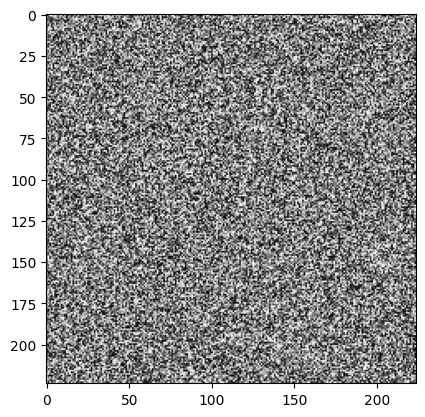

In [29]:
# Adds noise filter to image
def addNoise(img):
    for i in range(img.shape[0]):
        for j in range(img.shape[0]):
            pixelMask = random.uniform(0,1)
            img[i][j][0] += int(255 * pixelMask)
            img[i][j][1] += int(255 * pixelMask)
            img[i][j][2] += int(255 * pixelMask)
    
    return img

# Creating black image
noise = np.zeros((224,224,3)).astype(np.uint8)
# Adding noise
addNoise(noise)

# Display
plt.imshow(noise)


<h2>Smooth Noise</h2>
Standard noise seems "too random" since the pixels are selected by asigning random values to the pixels. To reduce the randomness of the generated image, context is given to the neighbouring pixels to smooth the image. Function <code>smoothImage</code> does just that.

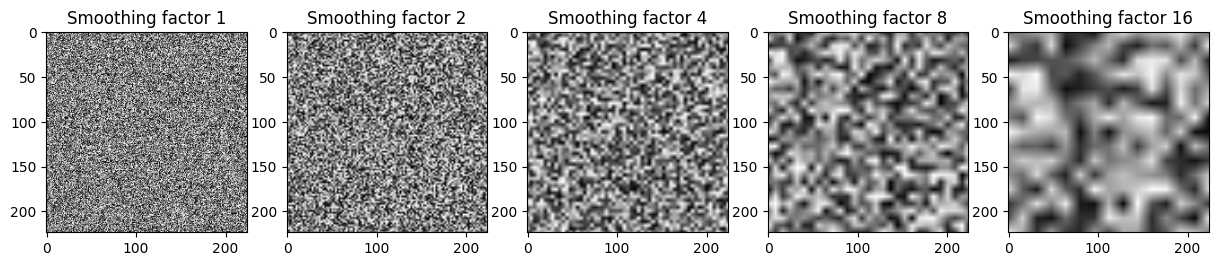

In [38]:
# Generates smooth noise
def smoothNoise(x, y, img):
    width = img.shape[1]
    height = img.shape[0]

    # Get decimal part for x and y
    fractX = x - int(x)
    fractY = y - int(y)

    # Wrap around
    x1 = (int(x) + width) % width
    y1 = (int(y) + height) % height

    # Neighbour values
    x2 = (x1 + width - 1) % width
    y2 = (y1 + height -1) % height

    # Smooth noise
    value = 0.0
    value += fractX * fractY * noise[y1][x1][0]
    value += (1 - fractX) * fractY * noise[y1][x2][0]
    value += fractX * (1 - fractY) * noise[y2][x1][0]
    value += (1 - fractX) * (1 - fractY) * noise[y2][x2][0]

    return value

# Smooth the image to desired factor
def smoothImage(img,factor):
    result = np.zeros(img.shape).astype(np.uint8)

    # Applies smooth noise
    for i in range(noise.shape[0]):
        for j in range(noise.shape[1]):
            res = int(smoothNoise(i/ factor, j / factor, noise))
            result[i][j][0] = res
            result[i][j][1] = res
            result[i][j][2] = res

    return result

# Smoothing with different factors
smooth = []
for i in range(5):
    smooth.append(smoothImage(noise, 2**i))

# Display
_, ax = plt.subplots(1,5, figsize=(15, 5))
for i in range(5):
    ax[i].imshow(smooth[i]), ax[i].set_title(f'Smoothing factor {2**i}')

